# Prediction and Sentiment Analysis of IMDB Reviews
## BUAN 6342.501
### Group 5

In [1]:
# Importing all the required libraries
import numpy as np
import pandas as pd
%matplotlib inline
import warnings
warnings.filterwarnings("ignore")

##  1. Loading the data

In [2]:
#loading the data into a dataframe
df = pd.read_csv('IMDB Dataset.csv')
df.head()

,review,sentiment
0,One of the other reviewers has mentioned that ...,positive
1,A wonderful little production. <br /><br />The...,positive
2,I thought this was a wonderful way to spend ti...,positive
3,Basically there's a family where a little boy ...,negative
4,"Petter Mattei's ""Love in the Time of Money"" is...",positive


In [3]:
print(df.shape) #Observing no of rows and columns
print(df.ndim)

(50000, 2)
2


In [4]:
df.dtypes #Checking the data types

review       object
sentiment    object
dtype: object

In [5]:
df.info() #Description of the dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB


## 2. Exploratory Data Analysis 

#### Handling Missing values and Duplicates

In [6]:
print(df.isna().sum())
print(df['review'].isna().sum()) #Checking the null values in text column

review       0
sentiment    0
dtype: int64
0


#### Classifying the reviews into positive and negative based on score and removing neutral score

<AxesSubplot:xlabel='sentiment', ylabel='count'>

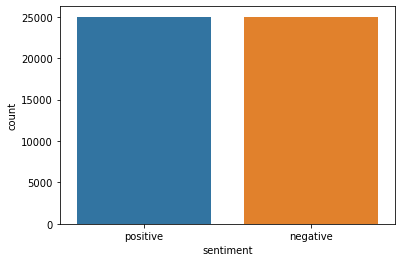

In [7]:
import seaborn as sns
sns.countplot(df['sentiment']) #Analysis of the target variable

# 3. Feature Extraction

### Text Preprocessing

1. Begin by removing the html tags.
2. Remove any punctuations or limited set of special characters like , or . or # etc.
3. Check if the word is made up of English letters and is not alpha-numeric.
4. Check to see if the length of the word is greater than 2 (as it was researched that there is no adjective in 2-letters).
5. Convert the word to lowercase.
6. Remove Stop words(Stop words considered as noise in the text. Text may contain stop words such as is, am, are, this, a, an, the, etc).
7. Finally Snowball Stemming the word (Stemming is the process of taking the related words and convert them in to base form Stemming helps in the reduction of the words to a compact form called word stem). Ex: taste ,tasty ,tasteful for these words base form is tast ,after stemming .

In [8]:
# Removing html tags
import re
def remove_html(text): #function to clean html tags in a sentence
    cleannr=re.compile('<.*?>')
    cleantext=re.sub(cleannr,'',text)
    return cleantext
df['review'] = df['review'].apply(remove_html)

In [9]:
# Removing punctuation
def remove_punctuation(text):
    final = "".join(u for u in text if u not in ("?", ".", ";", ":",  "!",'"',"#"))
    return final
df['review'] = df['review'].apply(remove_punctuation)

In [10]:
# Removing numbers and non alphabets
def remove_nonalpha(text):
    cleantext = re.sub('[^A-Za-z]+', ' ', text)
    return cleantext
df['review'] = df['review'].apply(remove_nonalpha)

In [11]:
# removing words with length less than 2
def remove_2letterwords(text):
    cleantext = re.sub(r'\b\w{1,2}\b','', text)
    return cleantext
df['review'] = df['review'].apply(remove_2letterwords)

In [12]:
# Converting to lowercase
df['review'] = df['review'].str.lower()

In [13]:
# removing whitespaces and stopwords along with stemming the words
import nltk
from nltk.corpus import stopwords
sno = nltk.stem.SnowballStemmer('english')
stopwords = set(stopwords.words('english')) #set of stopwords
def remove_stopwords_lower(text):
    return ' '.join(sno.stem(word.strip()) for word in text.split() if word.strip() not in stopwords)
df['review'] =df['review'].apply(remove_stopwords_lower)

In [14]:
#converting sentiment column to 0's and 1's
df['sentiment'] = df['sentiment'].replace({'positive': 1, 'negative': 0})

In [15]:
df.head()

,review,sentiment
0,one review mention watch episod hook right exa...,1
1,wonder littl product film techniqu unassum old...,1
2,thought wonder way spend time hot summer weeke...,1
3,basic famili littl boy jake think zombi closet...,0
4,petter mattei love time money visual stun film...,1


# PositiveWordCloud and NegativeWordCloud

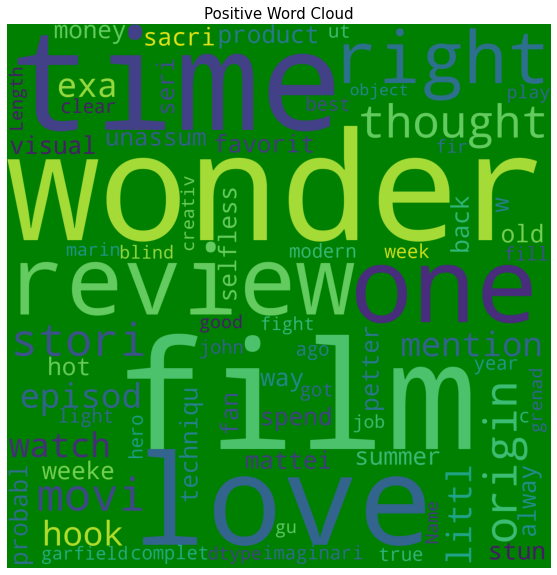

In [16]:
#Positive Word Cloud
from wordcloud import WordCloud
import matplotlib.pyplot as plt
positive=df[df['sentiment']==1]
plt.rcParams['figure.figsize']=(10,10)
plt.style.use('fast')
pos_wc=WordCloud(background_color='green',width=1500,height=1500).generate(str(positive['review']))
plt.title('Positive Word Cloud',fontsize=15)
plt.imshow(pos_wc)
plt.axis('off')
plt.show()

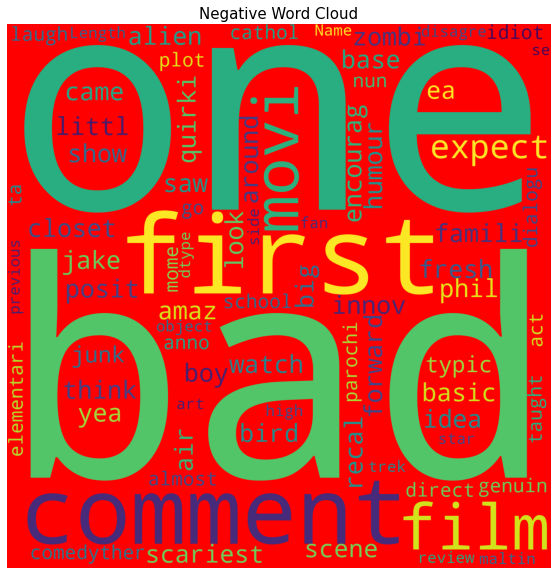

In [17]:
#Negative Word Cloud
negative=df[df['sentiment']==0]
plt.rcParams['figure.figsize']=(10,10)
plt.style.use('fast')
neg_wc=WordCloud(background_color='red',width=1500,height=1500).generate(str(negative['review']))
plt.title('Negative Word Cloud',fontsize=15)
plt.imshow(neg_wc)
plt.axis('off')
plt.show()

# Divide the data into Training and Testing

In [18]:
#splitting data to train and test
from sklearn.model_selection import train_test_split
x = df['review'].astype('str')
y = df['sentiment']
X_train,X_test,y_train,y_test = train_test_split(x,y,test_size=0.3,stratify=y,random_state=100)
print(f'shape of X_train is {X_train.shape}')
print(f'shape of X_test is {X_test.shape}')
print(f'shape of y_train is {y_train.shape}')
print(f'shape of y_test is {y_test.shape}')

shape of X_train is (35000,)
shape of X_test is (15000,)
shape of y_train is (35000,)
shape of y_test is (15000,)


##  Feature extraction methods

####  Bag of words

In [19]:
# bag of words
from sklearn.feature_extraction.text import CountVectorizer
bow = CountVectorizer()
bow.fit(X_train)
X_train_bow = bow.transform(X_train)
X_test_bow = bow.transform(X_test)
bow_features = bow.get_feature_names()

print('shape of X_train_bow is {}'.format(X_train_bow.get_shape()))
print('shape of X_test_bow is {}'.format(X_test_bow.get_shape()))

shape of X_train_bow is (35000, 104755)
shape of X_test_bow is (15000, 104755)


# 4. Classification Models

### Logistic Regression

In [20]:
#Created an object for Logistic Regression
from sklearn.linear_model import LogisticRegression
model = LogisticRegression()
model.fit(X_train_bow,y_train)

LogisticRegression()

### Plotting ROC - AUC Curve for Logistic Regression

In [21]:
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
train_fpr, train_tpr, thresholds = roc_curve(y_train, model.predict_proba(X_train_bow)[:,1])
test_fpr, test_tpr, thresholds = roc_curve(y_test, model.predict_proba(X_test_bow)[:,1])


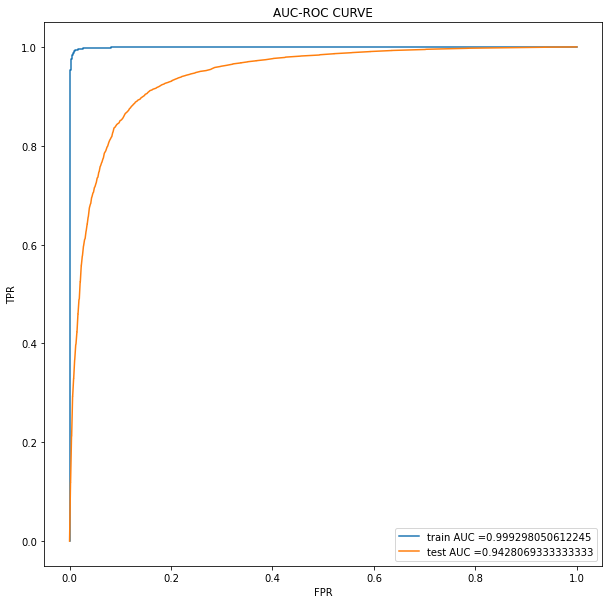

In [22]:
import matplotlib.pyplot as plt
plt.plot(train_fpr, train_tpr, label="train AUC ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label="test AUC ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC-ROC CURVE")
plt.show()


In [23]:
print('Area under train roc {}'.format(auc(train_fpr, train_tpr)))
print('Area under test roc {}'.format(auc(test_fpr, test_tpr)))

Area under train roc 0.999298050612245
Area under test roc 0.9428069333333333


In [24]:
from sklearn.metrics import confusion_matrix
cm_train = confusion_matrix(y_train,model.predict(X_train_bow))
cm_test =  confusion_matrix(y_test,model.predict(X_test_bow))
cm_train
cm_test

array([[6540,  960],
       [ 856, 6644]])

In [25]:
cm_train

array([[17330,   170],
       [  144, 17356]])

### Confusion Matrix - Logistic Regression

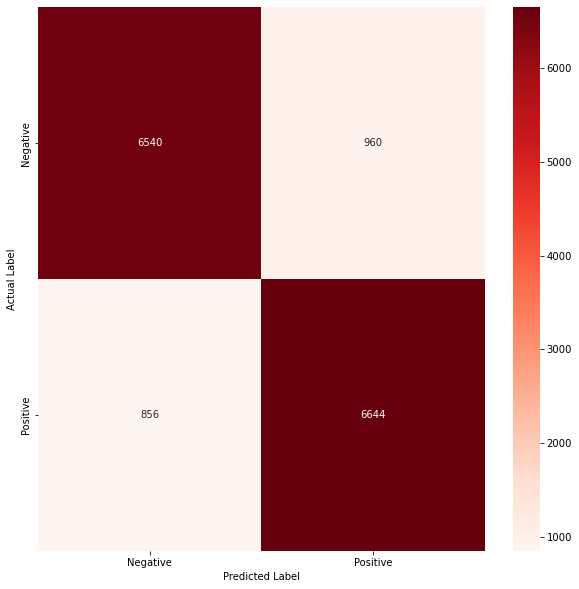

In [26]:
import seaborn as sns
ax = sns.heatmap(cm_test,annot=True,fmt='d',cmap='Reds')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.xaxis.set_ticklabels(['Negative','Positive'])
ax.yaxis.set_ticklabels(['Negative','Positive'])
plt.show()

In [27]:
y_test_pred = model.predict(X_test_bow)
y_train_pred = model.predict(X_train_bow)

In [28]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision score:', precision_score(y_test, y_test_pred))
print('Recall score:', recall_score(y_test, y_test_pred))
print('Accuracy score:', accuracy_score(y_test, y_test_pred))
print('F1 score:', f1_score(y_test, y_test_pred))

Precision score: 0.8737506575486585
Recall score: 0.8858666666666667
Accuracy score: 0.8789333333333333
F1 score: 0.8797669491525424


### XGBoost

In [29]:
from xgboost import XGBClassifier

In [30]:
from sklearn.model_selection import GridSearchCV

In [31]:
clf = XGBClassifier() #Creating an object for XGBClassifier
no_of_estimators = [100, 120,200,300]
maximumdepth = [10, 15, 25, 30]
parameters = {'n_estimators': no_of_estimators ,'max_depth':maximumdepth,
              'objective':['binary:logistic'],'subsample': ['0.8']}
model_xgb = GridSearchCV(estimator=clf, param_grid=parameters, cv=3)

In [32]:
model_xgb.fit(X_train_bow,y_train)

GridSearchCV(cv=3,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     gpu_id=None, grow_policy=None,
                                     importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=Non

In [33]:
model_xgb.score(X_test_bow,y_test)

0.8646666666666667

In [34]:
model_xgb.score(X_train_bow,y_train)

0.9976

In [35]:
model_xgb.best_params_

{'max_depth': 10,
 'n_estimators': 300,
 'objective': 'binary:logistic',
 'subsample': '0.8'}

In [36]:
model_xgb.best_score_

0.8586856324200048

### XGBoost AUC-ROC Curve

In [37]:
from sklearn import metrics
from sklearn.metrics import roc_curve,auc
from sklearn.metrics import roc_auc_score
train_fpr_xg, train_tpr_xg, thresholds_xg = roc_curve(y_train,model_xgb.predict_proba(X_train_bow)[:,1])
test_fpr_xg, test_tpr_xg, thresholds_xg = roc_curve(y_test,model_xgb.predict_proba(X_test_bow)[:,1])

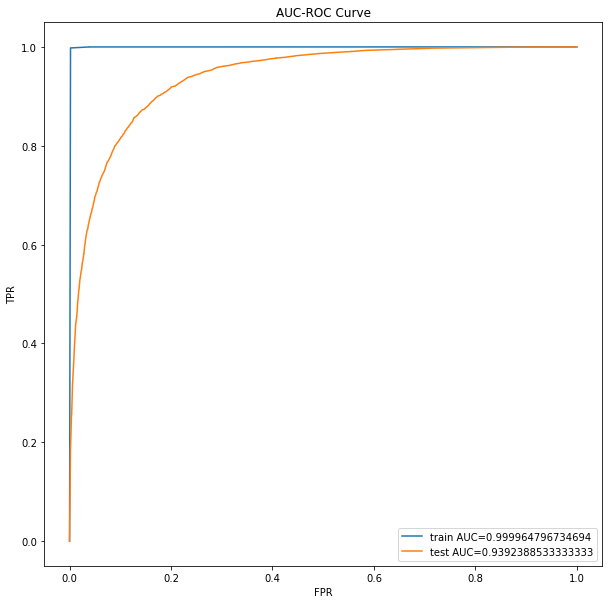

In [38]:
import matplotlib.pyplot as plt
plt.plot(train_fpr_xg,train_tpr_xg,label ="train AUC="+str(auc(train_fpr_xg,train_tpr_xg)))
plt.plot(test_fpr_xg,test_tpr_xg,label ="test AUC="+str(auc(test_fpr_xg,test_tpr_xg)))
plt.legend()
plt.xlabel("FPR")
plt.ylabel("TPR")
plt.title("AUC-ROC Curve")
plt.show()

In [39]:
print('Area under train roc {}'.format(auc(train_fpr_xg,train_tpr_xg)))
print('Area under test roc {}'.format(auc(test_fpr_xg,test_tpr_xg)))

Area under train roc 0.999964796734694
Area under test roc 0.9392388533333333


In [40]:
from sklearn.metrics import confusion_matrix
cm_train_xgb = confusion_matrix(y_train,model_xgb.predict(X_train_bow))
cm_test_xgb = confusion_matrix(y_test,model_xgb.predict(X_test_bow))
cm_train_xgb

array([[17437,    63],
       [   21, 17479]])

In [41]:
cm_test_xgb

array([[6448, 1052],
       [ 978, 6522]])

### XGBoost Confusion Matrix

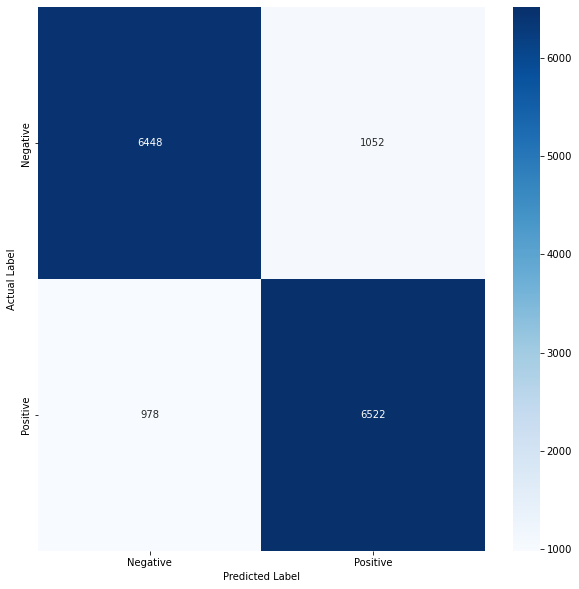

In [42]:
import seaborn as sns
ax = sns.heatmap(cm_test_xgb,annot=True,fmt='d',cmap='Blues')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.xaxis.set_ticklabels(['Negative','Positive'])
ax.yaxis.set_ticklabels(['Negative','Positive'])
plt.show()

In [43]:
best_est = XGBClassifier(**model_xgb.best_params_)
best_est = best_est.fit(X_train_bow,y_train)

Text(0, 0.5, 'Precision')

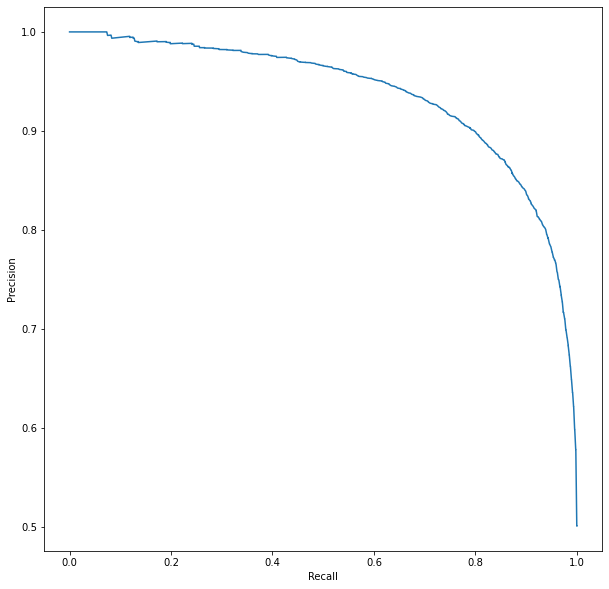

In [44]:
from sklearn.metrics import precision_recall_curve
proba = model_xgb.predict_proba(X_test_bow)[:, 1]
precision, recall, threshold = precision_recall_curve(y_test, proba)
plt.plot(recall, precision)
plt.xlabel('Recall')
plt.ylabel('Precision')

In [45]:
y_test_pred = model_xgb.predict(X_test_bow)
y_train_pred = model_xgb.predict(X_train_bow)

In [46]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision score:', precision_score(y_test, y_test_pred))
print('Recall score:', recall_score(y_test, y_test_pred))
print('Accuracy score:', accuracy_score(y_test, y_test_pred))
print('F1 score:', f1_score(y_test, y_test_pred))

Precision score: 0.8611037760760496
Recall score: 0.8696
Accuracy score: 0.8646666666666667
F1 score: 0.8653310335677324


# SVM 

In [47]:
from sklearn.svm import LinearSVC
from sklearn.model_selection import GridSearchCV

In [48]:
linear_svc = LinearSVC(random_state = 22) 
params_svc = {'C': [0.001, 0.01, 0.1, 1, 10, 100, 100000]}
grid_lr_svc = GridSearchCV(linear_svc,params_svc, n_jobs = 2)
grid_lr_svc.fit(X_train_bow,y_train)

/Users/surabhis/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/surabhis/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/surabhis/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/surabhis/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
/Users/surabhis/opt/anaconda3/lib/python3.9/site-packages/sklearn/svm/_base.py:985: Converge

GridSearchCV(estimator=LinearSVC(random_state=22), n_jobs=2,
             param_grid={'C': [0.001, 0.01, 0.1, 1, 10, 100, 100000]})

In [49]:
grid_lr_svc.best_params_

{'C': 0.01}

In [50]:
grid_lr_svc.score(X_train_bow,y_train),grid_lr_svc.score(X_test_bow,y_test)

(0.9603142857142857, 0.8862666666666666)

# confusion matrix 

In [51]:
from sklearn.metrics import confusion_matrix
cm_svm_train = confusion_matrix(y_train,grid_lr_svc.predict(X_train_bow))
cm_svm_test =  confusion_matrix(y_test,grid_lr_svc.predict(X_test_bow))
cm_svm_train
cm_svm_test

array([[6591,  909],
       [ 797, 6703]])

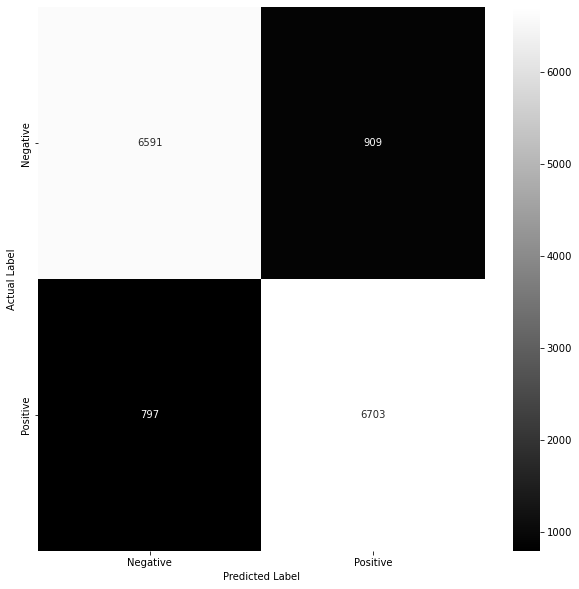

In [52]:
import matplotlib.pyplot as plt
import seaborn as sns
ax = sns.heatmap(cm_svm_test,annot=True,fmt='d',cmap='gray')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.xaxis.set_ticklabels(['Negative','Positive'])
ax.yaxis.set_ticklabels(['Negative','Positive'])
plt.show()

# AUC-ROC Curve

In [53]:
y_train_pred = grid_lr_svc.decision_function(X_train_bow)    
y_test_pred = grid_lr_svc.decision_function(X_test_bow) 

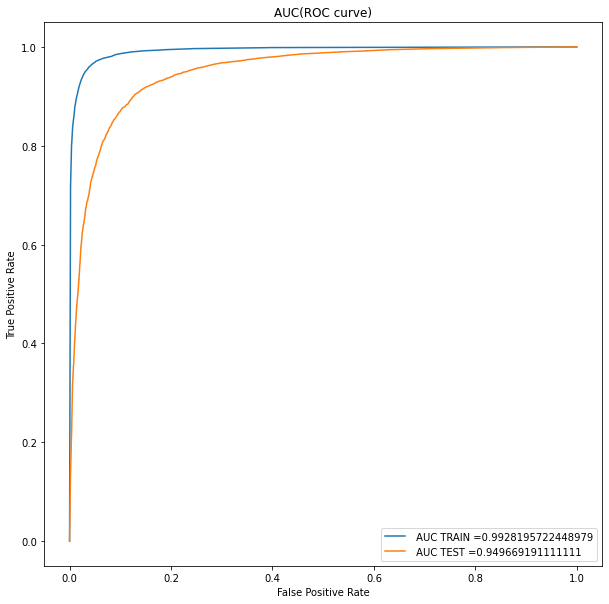

In [54]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred)
plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.show()

In [55]:
y_test_predict = grid_lr_svc.predict(X_test_bow)

In [56]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision score:', precision_score(y_test, y_test_predict))
print('Recall score:', recall_score(y_test, y_test_predict))
print('Accuracy score:', accuracy_score(y_test, y_test_predict))
print('F1 score:', f1_score(y_test, y_test_predict))

Precision score: 0.8805832895428272
Recall score: 0.8937333333333334
Accuracy score: 0.8862666666666666
F1 score: 0.8871095817893064


# Random Forest 

In [57]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import GridSearchCV
modelrandom = RandomForestClassifier()
modelrandom.fit(X_train_bow,y_train)

RandomForestClassifier()

In [58]:
no_of_estimators = [5, 10, 50, 100, 120]
maximumdepth = [1, 5, 7, 10, 15, 25, 30]
parameters = {'n_estimators': no_of_estimators ,'max_depth':maximumdepth}
modelrandom_grid = GridSearchCV(estimator=modelrandom, param_grid=parameters, cv=5)
modelrandom_grid.fit(X_train_bow,y_train)

GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid={'max_depth': [1, 5, 7, 10, 15, 25, 30],
                         'n_estimators': [5, 10, 50, 100, 120]})

In [59]:
modelrandom_grid.score(X_test_bow,y_test),modelrandom_grid.score(X_train_bow,y_train)

(0.8512, 0.9466857142857142)

In [60]:
modelrandom_grid.best_params_

{'max_depth': 30, 'n_estimators': 120}

# Confusion matrix 

In [61]:
from sklearn.metrics import confusion_matrix
cm_train_rf = confusion_matrix(y_train,modelrandom_grid.predict(X_train_bow))
cm_test_rf =  confusion_matrix(y_test,modelrandom_grid.predict(X_test_bow))
cm_train_rf
cm_test_rf

array([[6240, 1260],
       [ 972, 6528]])

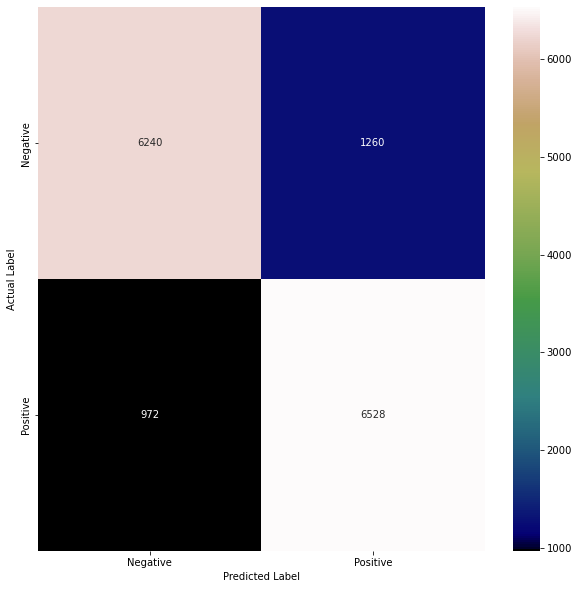

In [62]:
import seaborn as sns
ax = sns.heatmap(cm_test_rf,annot=True,fmt='d',cmap='gist_earth')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.xaxis.set_ticklabels(['Negative','Positive'])
ax.yaxis.set_ticklabels(['Negative','Positive'])
plt.show()

# AUC-ROC Curve 

In [63]:
from sklearn.metrics import confusion_matrix
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
train_fpr_rf, train_tpr_rf, thresholds_rf = roc_curve(y_train, modelrandom_grid.predict_proba(X_train_bow)[:,1])
test_fpr_rf, test_tpr_rf, thresholds_rf = roc_curve(y_test, modelrandom_grid.predict_proba(X_test_bow)[:,1])

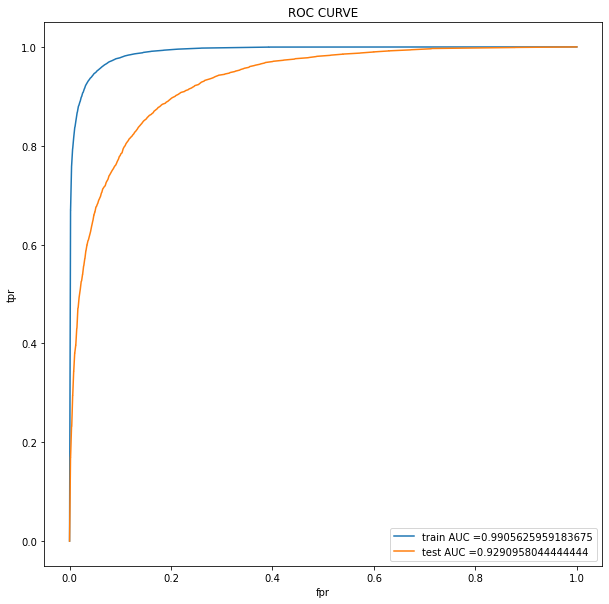

In [64]:
import matplotlib.pyplot as plt
plt.plot(train_fpr_rf, train_tpr_rf, label="train AUC ="+str(auc(train_fpr_rf, train_tpr_rf)))
plt.plot(test_fpr_rf, test_tpr_rf, label="test AUC ="+str(auc(test_fpr_rf, test_tpr_rf)))
plt.legend()
plt.xlabel("fpr")
plt.ylabel("tpr")
plt.title("ROC CURVE")
plt.show()

In [65]:
y_test_predict_rf = modelrandom_grid.predict(X_test_bow)

In [66]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision score:', precision_score(y_test, y_test_predict_rf))
print('Recall score:', recall_score(y_test, y_test_predict_rf))
print('Accuracy score:', accuracy_score(y_test, y_test_predict_rf))
print('F1 score:', f1_score(y_test, y_test_predict_rf))

Precision score: 0.8382126348228043
Recall score: 0.8704
Accuracy score: 0.8512
F1 score: 0.8540031397174255


# Naive Bayes Model

In [67]:
from sklearn.naive_bayes import MultinomialNB
nb_model=MultinomialNB()
nb_model.fit(X_train_bow,y_train)

MultinomialNB()

In [68]:
y_test_pred_nb = nb_model.predict(X_test_bow)

In [69]:
y_train_pred_nb=nb_model.predict(X_train_bow)

In [70]:
from sklearn.metrics import classification_report

In [71]:
print("Classification Report : \n\n\n ", classification_report(y_test , y_test_pred_nb))

Classification Report : 


                precision    recall  f1-score   support

           0       0.84      0.87      0.86      7500
           1       0.87      0.84      0.85      7500

    accuracy                           0.86     15000
   macro avg       0.86      0.86      0.86     15000
weighted avg       0.86      0.86      0.86     15000



# Confusion Matrix

In [72]:
cm_test_pred_nb=confusion_matrix(y_test,y_test_pred_nb)
cm_test_pred_nb

array([[6546,  954],
       [1216, 6284]])

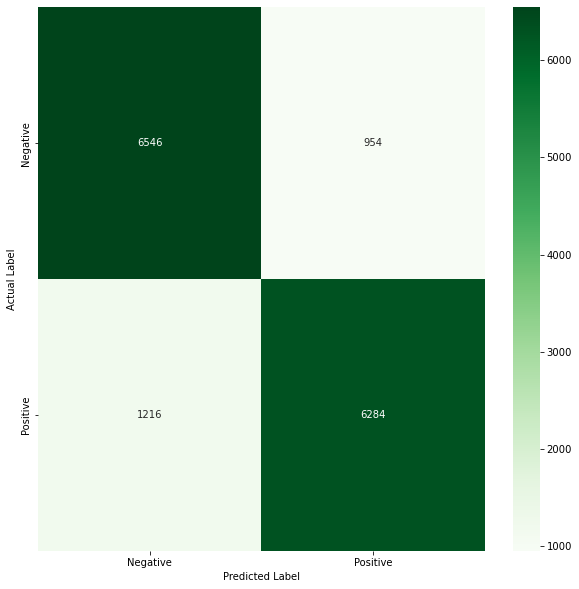

In [73]:
import seaborn as sns
ax = sns.heatmap(cm_test_pred_nb,annot=True,fmt='d',cmap='Greens')
ax.set_xlabel('Predicted Label')
ax.set_ylabel('Actual Label')
ax.xaxis.set_ticklabels(['Negative','Positive'])
ax.yaxis.set_ticklabels(['Negative','Positive'])
plt.show()

# AUC-ROC Curve

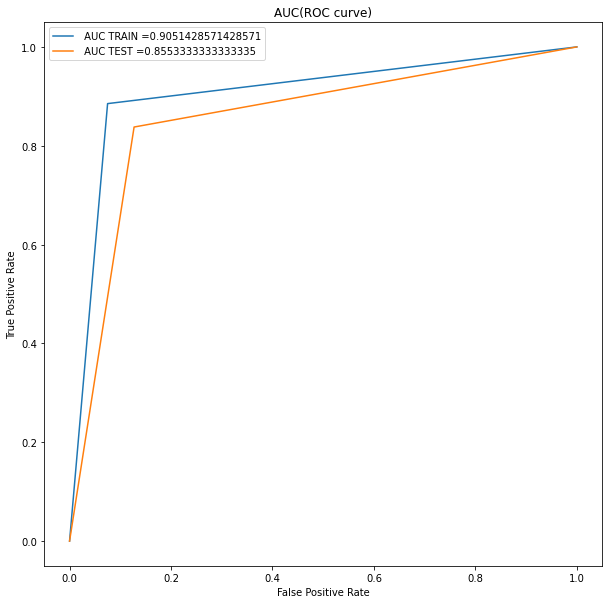

In [74]:
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score
train_fpr, train_tpr, tr_thresholds = roc_curve(y_train, y_train_pred_nb)
test_fpr, test_tpr, te_thresholds = roc_curve(y_test, y_test_pred_nb)
plt.plot(train_fpr, train_tpr, label=" AUC TRAIN ="+str(auc(train_fpr, train_tpr)))
plt.plot(test_fpr, test_tpr, label=" AUC TEST ="+str(auc(test_fpr, test_tpr)))
plt.legend()
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("AUC(ROC curve)")
plt.show()

In [75]:
from sklearn.metrics import precision_score, recall_score, accuracy_score, f1_score
print('Precision score:', precision_score(y_test, y_test_pred_nb))
print('Recall score:', recall_score(y_test, y_test_pred_nb))
print('Accuracy score:', accuracy_score(y_test, y_test_pred_nb))
print('F1 score:', f1_score(y_test, y_test_pred_nb))

Precision score: 0.868195634153081
Recall score: 0.8378666666666666
Accuracy score: 0.8553333333333333
F1 score: 0.8527615687338853


# Final Accuracy of different models 

Logistic Regression     0.87893


XG Boost                0.86466


SVM                     0.88626


Random Forest           0.85346 

Naive Bayes             0.85534


# By comparing all the testing accuracies we can conclude that SVM model has higher accuracy with 0.88626 comparing to other models